# Trabalho Prático 3 - Fase 3

- Janderson Glauber Mendes dos Santos - 2020054544

O objetivo desta fase 3 é consolidar os resultados obtidos na etapa 2 utilizando os conhecimentos obtidos ao longo do semestre. Dado que a parte de análise e preparação dos dados se demonstrou sólida durante o desenvolvimento da segunda fase, o objetivo é melhorar os resultados dos agrupamentos no contexto aplicado.


## Business Understanding

### Objetivo do Dataset

O dataset escolhido (disponível em https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?select=recommendations.csv) contém informações sobre mais de 41 milhões de análises de produtos realizadas na plataforma Steam, que é uma das maiores plataformas de distribuição de software focada em jogos e expansões.

Este dataset pode ser utilizado para agrupar os jogos disponíveis da plataforma em conjuntos com características comuns, que pode permitir uma análise do mercado da plataforma Steam sob a perspectiva da análise de dados.

### Origem dos dados

Os dados foram coletados de um dataset presente no Kaggle, que é um repositório online de datasets de todo tipo de dado, coletado por um pesquisador ucraniano. Os dados foram coletados da loja oficial da Steam utilizando técnicas de webscraping. Ele contém informações sobre análises de produtos da plataforma desde de 15 de Outubro de 2010 até 31 de Dezembro de 2022, contendo informações sobre as análises, sobre os jogos analisados e sobre o perfil dos usuários autores das análises. Neste trabalho o foco será nos dados relacionados às caacterísticas dos jogos, ou seja, nos dados que contém informações sobre os jogos e não sobre as análises em si.

### Características do Dataset

O dataset em questão é dividido em 3 arquivos principais: "games.csv", "recommendations.csv", e "users.csv" , e um arquivo auxiliar 'games_metadata.json' que serão detalhados nas próximas subsessões.

#### "games.csv"

Este arquivo contém as informações de cada um dos jogos dos quais alguma avaliação foi coletada pelo autor do dataset, ou seja, é um dataset com as informações detalhadas de cada um dos jogos que representam uma amostra de todos os jogos disponíveis na plataforma. Dentre as informações contidas sobre cada jogo estão: título, data de lançamento, plataformas disponíveis, rating, razão de avaliações positivas, número de reviews e preço.

#### "users.csv"

Este arquivo contém informações sobre os usuários que realizaram as avaliações que foram coletadas pelo autor. Sendo assim, para cada usário coletado, contém informações como o número de produtos adquiridos e número de reviews realizadas pelo usuário.

#### "recommendations.csv"

Este arquivo contém a informação alvo do desenvolvimento do dataset que são as informações relativas às avaliações dos jogos que foram coletadas do site oficial da plataforma Steam. Para cada uma das avaliações contém dados como, usuário que avaliou, jogo avaliado, quantidade de usuários que considerou a avaliação útil, quantidade de usuários que achou a avaliação divertida, data da avaliação, informação sobre a recomendação ou não do jogo pelo usuário autor da avaliação e o número de horas que o usuário jogou o jogo avaliado.

#### 'games_metadata.json'

Este arquivo contém mais informações sobre os jogos, especificamente a descrição do jogo na plataforma e as tags associadas ao jogo. Juntamente com o arquivo 'games.csv' será um dos principais arquivos para o desenvolvimento do projeto.

### Relação com o Problema de Negócio

A base de dados escolhida contém diversas informações sobre análises de jogos disponíveis na plataforma Steam. A Steam é um plataforma de distribuição de software focada em jogos, ou seja, é uma loja virtual, principalmente, de jogos que funciona como uma prateleira para os estúdios de desenvolvimento de jogos para seus produtos. Ela é uma das maiores plataformas de jogos online e contém também funções que remetem à uma rede social, criando uma forma de interação entre a comunidade.
Dentre deste contexto, os usuários da plataforma são capazes de avaliar todos os softwares que tenham adquirido de forma pública no ambiente comunitário da Steam. Pensando nisso, o autor da base de dados escolhida extraiu diversos dados relativos a essas análises que estão presentes no site oficial da plataforma Steam. Com esses dados, diversas tarefas podem ser resolvidas para resolver problemas que surgem nesse contexto. Neste projeto, utilizaremos estes dados para gerar conjuntos dentre os jogos disponíveis na plataforma com base nos dados disponíveis sobre cada um deles, de forma a entender melhor quais são os padrões de jogos disponibilizados na plataforma, como a comunidade reage a cada um desses padrões e outras informações relevantes que possam surgir.

## Data Understanding & Data Preparation

### Data Understanding


Para esta etapa focaremos em realizar a análise exploratória dos dados relativos aos jogos, concentrando, portanto, as análises nos arquivos 'games.csv' e 'games_metadata.json'

#### Exploração inicial

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Analisando inicialmente formato dos dados

In [ ]:
df = pd.read_csv('games.csv')
# recomendação LLM: print(df.shape)
print("Número de Atributos por jogo: ", df.shape[1])
print("Número de Jogos: ", df.shape[0])
df.head()

Número de Atributos por jogo:  13
Número de Jogos:  50872


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


Analisando tipo dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Adaptando dados para tipos de dados mais adequados

In [ ]:
df['title'] = df['title'].astype(str)
df['date_release'] = pd.to_datetime(df['date_release'])
df['rating'] = df['rating'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  object        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  object        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 3.7+ MB


Por meio da tabela é possível reconhecer a inexistência de valores nulos da tabela, removendo a necessidade do tratamento dos dados nesse sentido.

Análise dos dados numéricos relevantes:


In [ ]:
df[['positive_ratio','user_reviews','price_final','price_original','discount']].describe()

,positive_ratio,user_reviews,price_final,price_original,discount
count,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,100.000000,7.494460e+06,299.990000,299.990000,90.000000


Por meio da tabela criada é possível notar informações interessantes sobre os jogos da plataforma, como por exemplo o fato de que o preço médio dos jogos é baixo (\$ 8.72), porém o desvio padrão é alto para este dado, demonstrando grande variabilidade nos valores dos jogos. Outro fator importante é, por exemplo, que a maioria dos jogos tem preço baixo, sendo 75% deles com valores de até \$ 11, porém com um preço máximo alto de $ 299.99. Além disso, no momento da coleta dos dados a maioria dos jogos não tinha nenhum disconto no preço, mesmo que a média seja considerável (\$ 5.59). Em relação às avaliações, há uma quantidade média de avaliações considerável por jogos, por volta de 2000 avaliações por jogo, sendo que dos jogos coletados o que teve menos avaliações teve 10 avaliações, além disso, a taxa de avaliações positivas é, em média, significativamente alta (77.05%).

Análises dos dados categóricos relevantes:

In [ ]:
df[['win', 'mac','linux','rating','steam_deck']].describe()

,win,mac,linux,rating,steam_deck
count,50872,50872,50872,50872,50872
unique,2,2,2,9,2
top,True,False,False,Positive,True
freq,50076,37854,41831,13502,50870


Por meio da tabela acima é possível notar que a maior parte dos jogos coletados estãso disponíveis apenas para o windows, sendo o linux o sistema operacional com a menor quantidade de jogos disponíveis. Além disso, a categoria de avaliação mais comum dentre os jogos é 'Positive'. Outra informação relevante é que a plataforma com maior suporte aos jogos é o console da própria plataforma (steam deck).

Analisando completude dos dados:

In [ ]:
df.isnull().sum()


,0
app_id,0
title,0
date_release,0
win,0
mac,0
linux,0
rating,0
positive_ratio,0
user_reviews,0
price_final,0


#### Análise Visual

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


Analisando ano de lançamento dos jogos:


Text(0, 0.5, 'Número de Jogos')

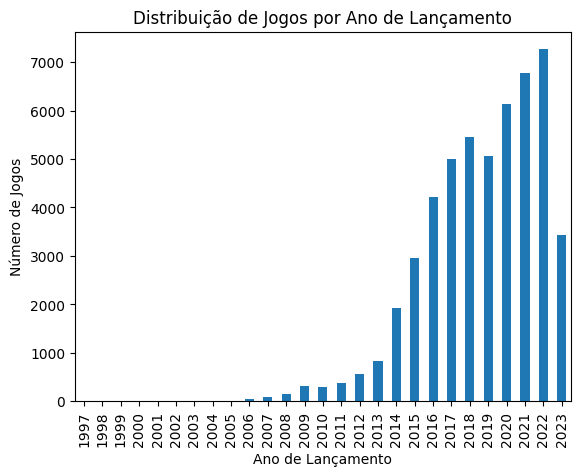

In [ ]:
year_counts = df['date_release'].dt.year.value_counts()
year_counts.sort_index(ascending=True).plot(kind='bar')
plt.title('Distribuição de Jogos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')

Pelo gráfico é possível notar um aumento no número de jogos lançados a cada ano com o tempo com poucos casos em que o número de anos de um ano foi menor que o ano anterior.

Analisando disponibilidade dos jogos nas plataformas (Sistemas Operacionais e steamdeck):

Text(0.5, 0, 'Plataforma')

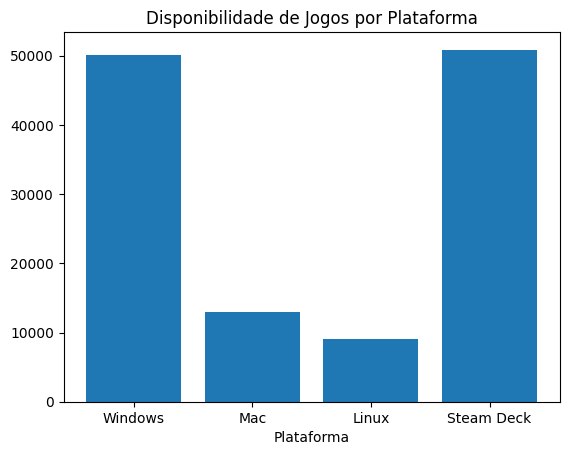

In [ ]:
avaibility_dict = {
    'Windows': df['win'].sum(),
    'Mac': df['mac'].sum(),
    'Linux': df['linux'].sum(),
    'Steam Deck': df['steam_deck'].sum()
}

plt.bar(avaibility_dict.keys(), avaibility_dict.values())
plt.title('Disponibilidade de Jogos por Plataforma')
plt.xlabel('Plataforma')

Por meio do gráfico aciam é possível consolidar a ideia já abordada anteriormente de que as plataformas que apresentam maior suporte para os jogos são Windows e Steam Deck.

Analisando evolução dos preços dos jogos ao longo dos anos:

Text(0, 0.5, 'Preço Médio dos Jogos')

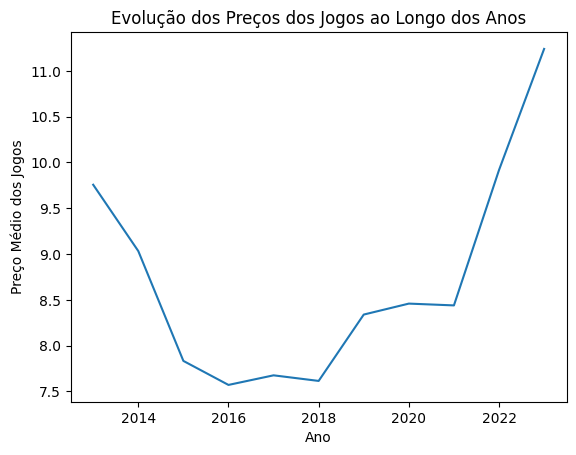

In [ ]:
df['year'] = df['date_release'].dt.year
df_recent = df[df['year']>=2013]
df_recent.groupby('year')['price_final'].mean().plot(kind='line')
plt.title('Evolução dos Preços dos Jogos ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Preço Médio dos Jogos')

O gráfico acima mostra a evolução do preço médio dos jogos a partir de 2013 (dado que para os dados em questão a quantidade de jogos coletados de anos anteriores foi pequena o que poderia enviezar a análise). Com esta visualização é possível notar que de 2013 a 2018 houve uma queda no preço médio dos jogos, porém a partir de 2018 esse valor começou a subir, até que em 2021 esses valores foram elevados de forma abrupta levando ao maior preço médio considerando o tempo analisado.

#### Insights sobre os dados

Analisando distribuição das 20 tags mais populares:

In [ ]:
import json

valid_lines = []
with open('games_metadata.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f, 1):
        try:
            valid_lines.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Linha {i} inválida: {e}")

import pandas as pd
df_metadata = pd.DataFrame(valid_lines)


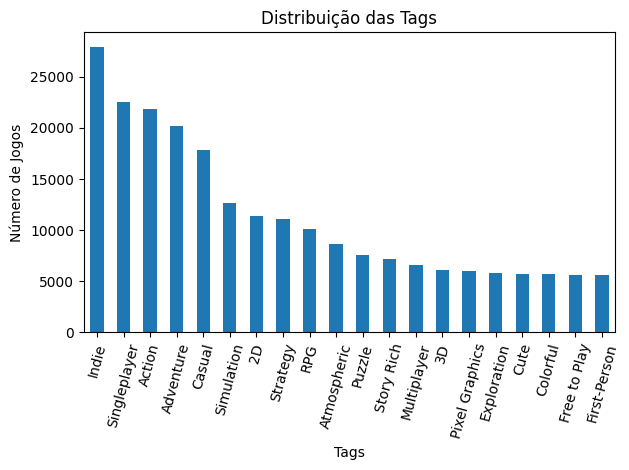

In [ ]:
import matplotlib.pyplot as plt

df_tags = df_metadata[['app_id','tags']].explode('tags')
df_tags['tags'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

plt.title('Distribuição das Tags')
plt.xlabel('Tags')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


Analisando correlação entre número de jogos indies lançados e preço médio dos jogos ao longo dos anos(2013 - Atual):

In [ ]:
import numpy as np
df_indie = df_metadata[df_metadata['tags'].apply(lambda x: 'Indie' in x)]
df_indie = df_indie.join(df.set_index('app_id'), on='app_id')
df_indie['year'] = df_indie['date_release'].dt.year
df_indie = df_indie[df_indie['year']>=2013]

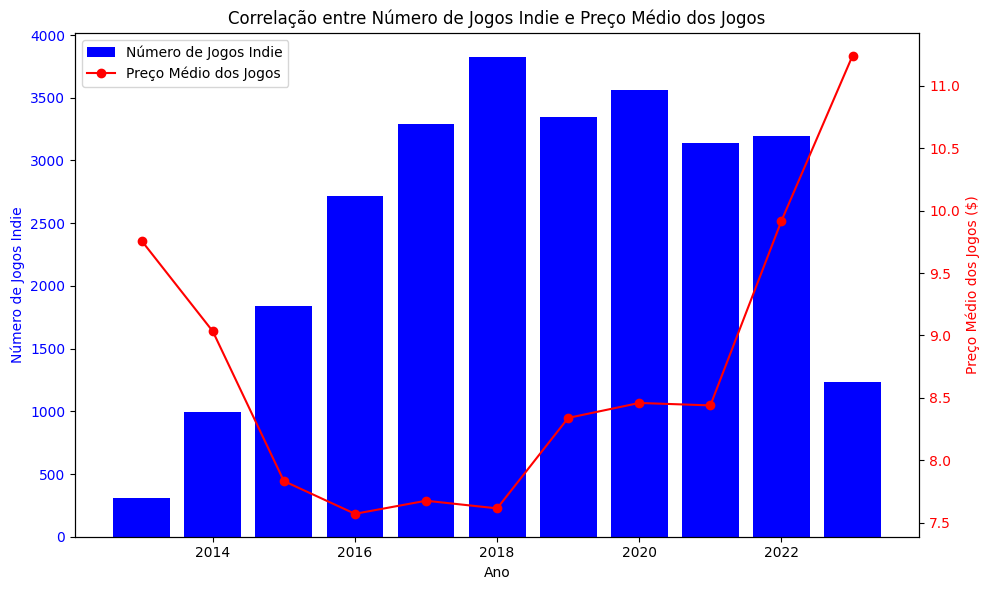

In [ ]:
# Preparar os dados
index = df_indie.groupby('year')['price_final'].count().index
values_num_indies = df_indie.groupby('year')['price_final'].count().values
values_price = df_recent.groupby('year')['price_final'].mean().values

# Criar figura e eixo principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras no eixo da esquerda (número de jogos indie)
ax1.bar(index, values_num_indies, color='blue', label='Número de Jogos Indie')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de Jogos Indie', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo secundário à direita
ax2 = ax1.twinx()
ax2.plot(index, values_price, color='red', marker='o', label='Preço Médio dos Jogos')
ax2.set_ylabel('Preço Médio dos Jogos ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título e legendas
plt.title('Correlação entre Número de Jogos Indie e Preço Médio dos Jogos')

# Legendas combinadas
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

Podemos ver por meio do gráfico acima que o aumento no número de jogos indie lançados coincide com a diminuição no preço médio dos jogos, com excessão para os anos a partir de 2021, nos quais mesmo com muitos jogos desta categoria sendo lançados ainda houve um aumento no preço médio dos jogos.

### Data Preparation

#### Limpeza dos dados


In [ ]:
df = pd.read_csv('games.csv')

In [ ]:
df = df.drop_duplicates(subset=['app_id'])

In [ ]:
df['title'] = df['title'].astype(str)
df['date_release'] = pd.to_datetime(df['date_release'])
df['rating'] = df['rating'].astype(str)
df['year'] = df['date_release'].dt.year

#### Transformação dos dados

In [ ]:
import json

valid_lines = []
with open('games_metadata.json', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f, 1):
        try:
            valid_lines.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Linha {i} inválida: {e}")

import pandas as pd
df_metadata = pd.DataFrame(valid_lines)


In [ ]:
df_metadata

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
...,...,...,...
50867,2296380,,[]
50868,1272080,,[]
50869,1402110,,[]
50870,2272250,Embark on a journey into the darkest nightmare...,"[Early Access, FPS, Action, Retro, First-Perso..."


Durante esta etapa, aplicamos o one-hot encoding à coluna de tags, o que resultou em mais de 400 novas variáveis. Essa alta dimensionalidade teve um impacto significativo nos algoritmos de clusterização, dificultando a identificação de estruturas claras nos dados e resultando em valores de Silhouette Score pouco representativos. Para contornar esse problema e explorar melhor os padrões do conjunto de dados, optamos por realizar a clusterização inicialmente sem as tags. Posteriormente, pretendemos reintegrar essas variáveis ao modelo, aplicar novamente os algoritmos de clusterização e comparar os resultados com e sem o uso das tags.

In [ ]:
# # df_metadata = pd.read_json('games_metadata.json', lines=True)
# df_tags = df_metadata[['app_id','tags']].explode('tags')
# one_hot_tags = pd.get_dummies(df_tags['tags'])
# one_hot_tags = df_tags[['app_id']].join(one_hot_tags)
# one_hot_encoded = one_hot_tags.groupby('app_id').max().reset_index()
# one_hot_encoded


In [ ]:
temp_df = df[['app_id','rating']]
df_rating = temp_df[['app_id','rating']].explode('rating')
one_hot_ratings = pd.get_dummies(df_rating['rating'])
one_hot_ratings = df_rating[['app_id']].join(one_hot_ratings)
one_hot_encoded_rating = one_hot_ratings.groupby('app_id').max().reset_index()
one_hot_encoded_rating

,app_id,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive
0,10,False,False,False,False,False,True,False,False,False
1,20,False,False,False,False,False,False,False,False,True
2,30,False,False,False,False,False,False,False,False,True
3,40,False,False,True,False,False,False,False,False,False
4,50,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
50867,2581740,True,False,False,False,False,False,False,False,False
50868,2585630,False,False,False,False,False,False,False,False,True
50869,2585640,False,False,True,False,False,False,False,False,False
50870,2593020,True,False,False,False,False,False,False,False,False


In [ ]:
# games_relevant_columns = ['app_id','win','mac','linux','positive_ratio','user_reviews','price_final','price_original','discount','steam_deck','year']
games_relevant_columns = ['app_id','positive_ratio','user_reviews','price_final','price_original','discount']
final_df = df[games_relevant_columns]
# final_df = final_df.merge(one_hot_encoded, on='app_id', how='inner')
final_df = final_df.merge(one_hot_encoded_rating, on='app_id', how='inner')
final_df

,app_id,positive_ratio,user_reviews,price_final,price_original,discount,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive
0,13500,84,2199,9.99,9.99,0.0,False,False,False,False,False,False,False,False,True
1,22364,85,21,2.99,2.99,0.0,False,False,False,False,False,False,True,False,False
2,113020,92,3722,14.99,14.99,0.0,False,False,False,False,False,False,False,False,True
3,226560,61,873,14.99,14.99,0.0,True,False,False,False,False,False,False,False,False
4,249050,88,8784,11.99,11.99,0.0,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,96,101,22.00,0.00,0.0,False,False,False,False,False,False,False,False,True
50868,1272080,38,29458,40.00,0.00,0.0,False,True,False,False,False,False,False,False,False
50869,1402110,89,1128,30.00,0.00,0.0,False,False,False,False,False,False,False,False,True
50870,2272250,95,82,17.00,0.00,0.0,False,False,False,False,False,False,False,False,True


In [ ]:
final_df.head()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount,Mixed,Mostly Negative,Mostly Positive,Negative,Overwhelmingly Negative,Overwhelmingly Positive,Positive,Very Negative,Very Positive
0,13500,84,2199,9.99,9.99,0.0,False,False,False,False,False,False,False,False,True
1,22364,85,21,2.99,2.99,0.0,False,False,False,False,False,False,True,False,False
2,113020,92,3722,14.99,14.99,0.0,False,False,False,False,False,False,False,False,True
3,226560,61,873,14.99,14.99,0.0,True,False,False,False,False,False,False,False,False
4,249050,88,8784,11.99,11.99,0.0,False,False,False,False,False,False,False,False,True


## Modeling

Para este trabalho, optamos por explorar dois algoritmos de clusterização: K-Means e DBSCAN.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

Remoção da coluna app_id pois não influência na análise dos dados

In [ ]:
X = final_df.drop(columns=['app_id'])

Executamos a normalização dos dados para que valores muito discrepantes não gerassem um enviesamento muito brusco

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

O código abaixo apresenta a aplicação do PCA (Análise de Componentes Principais) para a redução de dimensionalidade do dataset. No entanto, observa-se que, para reter uma parcela significativa da variância explicada, é necessário manter um número elevado de componentes principais — próximo da dimensionalidade original do conjunto de dados. Isso indica que a variância está bastante dispersa entre as variáveis e que a estrutura dos dados é intrinsecamente de alta dimensionalidade.

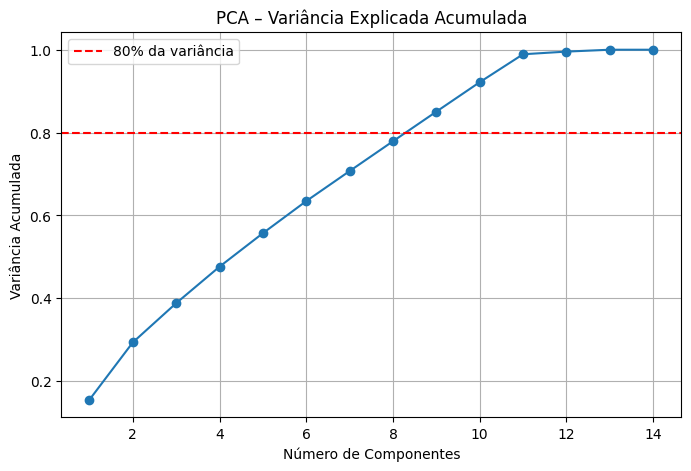

In [ ]:
pca_full = PCA().fit(X_scaled)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% da variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('PCA – Variância Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

Aplicando o PCA para 10 dimensões, o ideal para garantir pelo menos 90% de variancia

In [ ]:
pca_290 = PCA(n_components= 10, random_state=42)
X_pca_290 = pca_290.fit_transform(X_scaled)
total_var = pca_290.explained_variance_ratio_.sum()
print(f"Variância total explicada com 10 componentes: {total_var:.4f} ({total_var*100:.2f}%)")


Variância total explicada com 10 componentes: 0.9216 (92.16%)


Agora aplicamos os algoritmos de clusterização. Embora o PCA tenha sido utilizado para reduzir a dimensionalidade, o número de componentes ainda se manteve relativamente alto. Por isso, realizamos testes comparativos para avaliar se a utilização do novo conjunto de dados transformado pelo PCA traria resultados superiores em relação aos dados originais. Além disso, foram testados diversos valores de k no K-Means, sendo o melhor resultado obtido com k = 14 clusters.

Como conclusão, observamos que o uso do PCA melhorou levemente a qualidade da clusterização, refletido por um aumento no Silhouette Score. Isso ocorre porque o PCA é eficaz na remoção de ruído e redundância, tornando o espaço de dados mais compacto e informativo. Ao projetar os dados nas direções de maior variância, o PCA facilita a separação entre os grupos, o que beneficia algoritmos baseados em distância como o K-Means.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# A. K-Means com os dados originais
k = 10
kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")

# B. K-Means com os dados reduzidos por PCA
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_pca_k_means = kmeans_pca.fit_predict(X_pca_290)
sil_pca = silhouette_score(X_pca_290, labels_pca_k_means)
print(f"[PCA-290]  Silhouette Score com k={k}: {sil_pca:.4f}")

[ORIGINAL] Silhouette Score com k=10: 0.5974
[PCA-290]  Silhouette Score com k=10: 0.6263


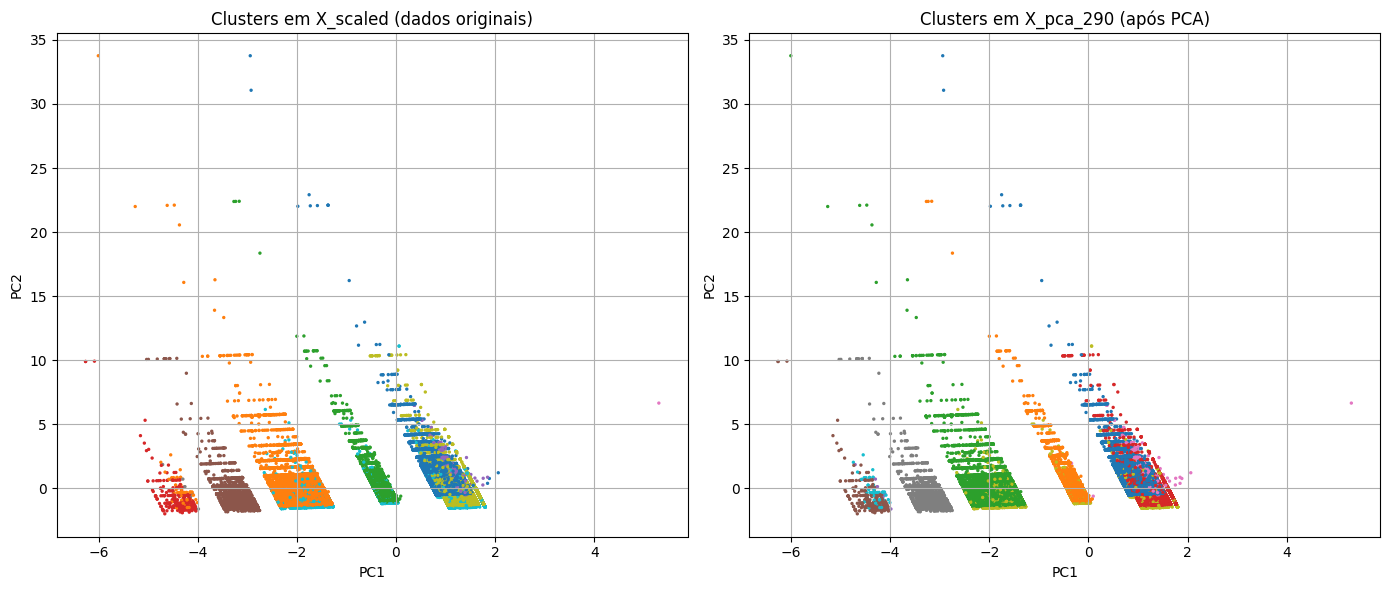

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA para visualização em 2D
pca_vis = PCA(n_components=2, random_state=42)
X_scaled_2d = pca_vis.fit_transform(X_scaled)
X_pca_290_2d = pca_vis.fit_transform(X_pca_290)

# Visualização dos clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Clusters nos dados originais
axes[0].scatter(X_scaled_2d[:, 0], X_scaled_2d[:, 1], c=labels_original, cmap='tab10', s=2)
axes[0].set_title('Clusters em X_scaled (dados originais)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Clusters nos dados após PCA
axes[1].scatter(X_pca_290_2d[:, 0], X_pca_290_2d[:, 1], c=labels_pca_k_means, cmap='tab10', s=2)
axes[1].set_title('Clusters em X_pca_290 (após PCA)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

plt.tight_layout()
plt.show()


Como foi possível observar não foi encontrada uma Silhouette Score relevante para o K-means. Logo, tentaremos outra abordagem com DB-Scan

In [ ]:
from sklearn.cluster import DBSCAN

# Parâmetros do DBSCAN (você pode ajustar esses valores)
eps = 2.0           # raio máximo de vizinhança
min_samples = 100     # número mínimo de pontos para formar um cluster

# Aplica DBSCAN aos dados após PCA
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_pca_290)

# Número de clusters (ignora ruído rotulado como -1)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise = np.sum(labels_dbscan == -1)

print(f"[DBSCAN] Número de clusters encontrados: {n_clusters}")
print(f"[DBSCAN] Número de pontos rotulados como ruído: {n_noise}")

[DBSCAN] Número de clusters encontrados: 7
[DBSCAN] Número de pontos rotulados como ruído: 296


In [ ]:
if n_clusters > 1:
    sil_dbscan = silhouette_score(X_pca_290, labels_dbscan)
    print(f"[DBSCAN] Silhouette Score: {sil_dbscan:.4f}")
else:
    print("[DBSCAN] Não foi possível calcular o Silhouette Score (menos de 2 clusters).")

# Adiciona os rótulos ao DataFrame original
df_dbscan = final_df.copy()
df_dbscan['cluster'] = labels_dbscan

[DBSCAN] Silhouette Score: 0.6028


Agora vamos tentar realizar a clusterização com as tags dos jogos incluidas nesse dataset. Usar as tags gerou baixo silhouete score

In [ ]:
df_metadata = pd.read_json('games_metadata.json', lines=True)
df_tags = df_metadata[['app_id','tags']].explode('tags')
one_hot_tags = pd.get_dummies(df_tags['tags'])
one_hot_tags = df_tags[['app_id']].join(one_hot_tags)
one_hot_encoded = one_hot_tags.groupby('app_id').max().reset_index()
one_hot_encoded


,app_id,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,10,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,20,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,40,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2581740,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50868,2585630,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50869,2585640,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
50870,2593020,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
final_df_tags = final_df.merge(one_hot_encoded, on='app_id', how='inner')


In [ ]:
X = final_df_tags.drop(columns=['app_id'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


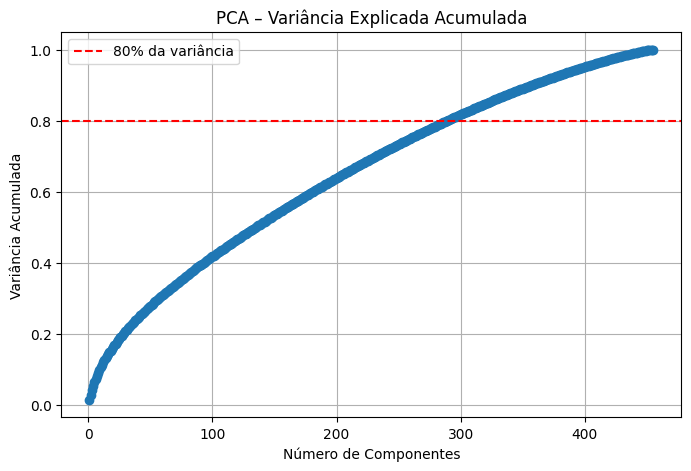

In [ ]:
pca_full = PCA().fit(X_scaled)
explained_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% da variância')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Acumulada')
plt.title('PCA – Variância Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pca_290 = PCA(n_components= 300, random_state=42)
X_pca_290 = pca_290.fit_transform(X_scaled)
total_var = pca_290.explained_variance_ratio_.sum()
print(f"Variância total explicada com 290 componentes: {total_var:.4f} ({total_var*100:.2f}%)")

Variância total explicada com 290 componentes: 0.8178 (81.78%)


In [ ]:
k = 10

# B. K-Means com os dados reduzidos por PCA
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_pca = kmeans_pca.fit_predict(X_pca_290)
sil_pca = silhouette_score(X_pca_290, labels_pca)
print(f"[PCA-290]  Silhouette Score com k={k}: {sil_pca:.4f}")

[PCA-290]  Silhouette Score com k=10: 0.1051


Agora testar o uso de um subconjunto das tags mais relevantes para testar o impacto delas na geração dos clusters.


In [ ]:
columns = final_df.columns.tolist()
principal_tags = one_hot_tags.sum(axis=0).sort_values(ascending=False).head(6)
principal_columns = columns + principal_tags.index.tolist()

final_df_selected_tags = final_df_tags[principal_columns].fillna(0)

final_df_selected_tags['Singleplayer'] = final_df_selected_tags['Singleplayer'].astype(int)
final_df_selected_tags['Indie'] = final_df_selected_tags['Indie'].astype(int)
final_df_selected_tags['Action'] = final_df_selected_tags['Action'].astype(int)
final_df_selected_tags['Adventure'] = final_df_selected_tags['Adventure'].astype(int)
final_df_selected_tags['Casual'] = final_df_selected_tags['Casual'].astype(int)

In [ ]:
X = final_df_selected_tags.drop(columns=['app_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.2445


Podemos ver que mesmo selecionando um subconjunto das tags mais relevantes não houve uma melhora no silhouette score. Testaremos agora utilizar apenas a tag mais relevante:

In [ ]:
columns = final_df.columns.tolist()
principal_tags = one_hot_tags.sum(axis=0).sort_values(ascending=False).head(2)
principal_columns = columns + principal_tags.index.tolist()

final_df_selected_tags = final_df_tags[principal_columns].fillna(0)

final_df_selected_tags['Singleplayer'] = final_df_selected_tags['Singleplayer'].astype(int)


In [ ]:
X = final_df_selected_tags.drop(columns=['app_id'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.4806


É possível notar que mesmo selecionando apenas a tag mais comum dentre os jogos a métrica ainda é pior do que a selecionada inicialmente. Por fim, testaremos utilizar apenas os atributos numéricos dos jogos, excluindo a categoria das análises e as tags, filtrando ao máximo a quantidade de atributos.

In [ ]:

principal_columns = ['positive_ratio','user_reviews','price_final','price_original','discount']

final_df_least_columns = final_df[principal_columns].fillna(0)



In [ ]:
X = final_df_least_columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10

kmeans_original = KMeans(n_clusters=k, random_state=42, n_init='auto')
labels_original = kmeans_original.fit_predict(X_scaled)
sil_original = silhouette_score(X_scaled, labels_original)
print(f"[ORIGINAL] Silhouette Score com k={k}: {sil_original:.4f}")


[ORIGINAL] Silhouette Score com k=10: 0.3611


Por fim, podemos notar que apesar dos diversos testes realizados o melhor resultado, considerando o silhoutte score, foi utilizando apenas os dados presentes na tabela games que não possuía informações sobre as categorias dos jogos, mas sim atributos sobre preço e estatísticas das análises relativas ao jogo. Este último teste demonstrou que apesar do aumento de dimensionalidade gerado pelo uso da categoria das análises ('muito bom', 'bom', 'ruim', etc) no algoritmo de clusterização ele se demontrou importante ao gerar um silhouette score melhor que o caso onde foi utilizada uma quantidade menor de atributos.


## Evaluation

Vamos tentar avaliar os dados dentro desses clusters

In [ ]:
games_relevant_columns = ['app_id', 'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'discount']

# 2. Crie DataFrame apenas com essas colunas
df_relevant = final_df[games_relevant_columns].copy()

# 3. Adicione os rótulos de cluster
df_relevant['cluster'] = labels_pca_k_means  # ou labels_original, se preferir

In [ ]:
# 4. Calcule a média por cluster

cluster_summary = df_relevant.groupby('cluster').mean(numeric_only=True)
print("📊 Médias por cluster:")
print(cluster_summary)

📊 Médias por cluster:
               app_id  positive_ratio  user_reviews  price_final  \
cluster                                                            
0        9.897074e+05       88.830402   2531.982334    10.654950   
1        9.894190e+05       74.577247    920.236678     9.461046   
2        9.504518e+05       57.544989    465.624206     9.140841   
3        1.289081e+06       91.251311     21.908754     6.788531   
4        1.098200e+06       14.214286  15895.857143     8.600000   
5        9.797953e+05       11.851485     18.353135     8.199736   
6        9.481905e+05       95.955066  40164.180617    11.996167   
7        9.070683e+05       31.276906    262.856679     8.075890   
8        1.075669e+06       79.091491    599.977287     2.791647   
9        1.027496e+06       13.633333    143.950000    10.217500   

         price_original   discount  
cluster                             
0              9.739448   0.786879  
1              9.231413   1.825265  
2            

Cluster 0: Jogos bem avaliados (89%), com bom volume de reviews e preço moderado. Produtos sólidos e confiáveis.

Cluster 1: Avaliação mediana (75%) e reviews moderados. Jogos medianos em todos os aspectos.

Cluster 2: Jogos com baixa avaliação (57%) e poucos reviews. Pouca qualidade percebida.

Cluster 3: Jogos altamente avaliados (91%) e baratos, mas ainda desconhecidos. Boas oportunidades escondidas.

Cluster 4: Altamente populares (15k reviews), mas muito mal avaliados (14%). Jogos criticados apesar da fama.

Cluster 5: Pior avaliação (12%) e quase nenhum review. Jogos irrelevantes e mal aceitos.

Cluster 6: Jogos excelentes (96%) e extremamente populares. Os grandes sucessos da plataforma.

Cluster 7: Jogos mal avaliados (31%) e pouco engajamento. Baixa reputação geral.

Cluster 8: Avaliação boa (79%) com preço muito baixo e altíssimo desconto. Jogos acessíveis e com bom custo-benefício.

Cluster 9: Jogos pouco populares e mal avaliados (14%), com preço alto. Provável má precificação.

## Conclusão final
Por fim, após realizar vários testes utilizando diferentes subconjuntos dos dados que estavam disponíveis para análise foi possível notar que as principais informações para a obtenção dos melhores resultados ao realizar o clustering foram as que estavam no arquivo 'games.csv' que continham informações básicas sobre os jogos como preço, número de análises e resumo estatístico das análises.

Outro resultado importante a ser notado é que, apesar do melhor resultado apresentar um silhoutte score de aproximadament 0.62 para um  clustering em dados com 14 atributos que não é necessariamente baixo mas não representa uma sustentação alta para a qualidade da separação dos agrupamentos gerados, foi possível gerar interpretações razoáveis para os grupos gerados, o que demonstra que o agrupamento na prática se tornou efetivo para resolver o problema proposto que era entender quais padrões de jogos estavam presentes na plataforma.

Enfim, considerando a limitação dos dados utilizados foi possível gerar informações relevantes sobre os conteúdos que circulam na plataforma Steam, que podem ser úteis para a análise do comportamento da empresa em relação tanto ao público, no que se diz respeito a entender melhor quais jogos são desenvolvidos para cada perfil de usuário, quanto em relação às desenvolvedoras, no que diz respeito à direcionar seus produtos para o público-alvo adequado ao seu perfil, de forma a melhorar os resultados de um lançamento ou até mesmo de um jogo já existente na plataforma.